In [13]:
import sys  
sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Importing

In [14]:
df = pd.read_csv('../data/prices_round_2_day_0.csv', index_col='timestamp', delimiter=';')
df.head()

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,PEARLS,9998,1,9995.0,30.0,NaN,NaN,10005,30,NaN,NaN,NaN,NaN,10001.5,0.0
0,0,COCONUTS,8113,205,NaN,NaN,NaN,NaN,8116,205,NaN,NaN,NaN,NaN,8114.5,0.0
0,0,BANANAS,4893,1,4892.0,30.0,NaN,NaN,4899,30,NaN,NaN,NaN,NaN,4896.0,0.0
0,0,PINA_COLADAS,15225,82,NaN,NaN,NaN,NaN,15228,82,NaN,NaN,NaN,NaN,15226.5,0.0
100,0,COCONUTS,8113,192,NaN,NaN,NaN,NaN,8115,70,8116.0,122.0,NaN,NaN,8114.0,0.0


In [15]:
df_pearls = df.loc[df['product']=='PEARLS'][['mid_price']].rename(columns={'mid_price': 'pearls'})
df_bananas = df.loc[df['product']=='BANANAS'][['mid_price']].rename(columns={'mid_price': 'bananas'})
df_pina_coladas = df.loc[df['product']=='PINA_COLADAS'][['mid_price']].rename(columns={'mid_price': 'pina_coladas'})
df_coconuts = df.loc[df['product']=='COCONUTS'][['mid_price']].rename(columns={'mid_price': 'coconuts'})
df = pd.concat([df_pearls, df_bananas, df_pina_coladas, df_coconuts], axis=1)
df.columns = pd.MultiIndex.from_product([['mid_price'], df.columns.tolist()])
df

mid_price                              
             pearls bananas pina_coladas coconuts
timestamp                                        
0           10001.5  4896.0      15226.5   8114.5
100          9999.0  4894.0      15224.5   8114.0
200         10000.0  4895.5      15226.5   8114.5
300          9997.0  4896.0      15225.5   8114.0
400         10001.0  4896.5      15221.5   8113.0
...             ...     ...          ...      ...
999500       9998.5  4870.5      15005.5   8002.0
999600       9999.0  4869.5      15003.5   8001.0
999700      10000.0  4875.5      15004.5   8001.0
999800      10000.0  4872.5      15011.5   8003.0
999900      10000.0  4873.0      15012.5   8003.5

[10000 rows x 4 columns]

# Initial Returns Observation

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

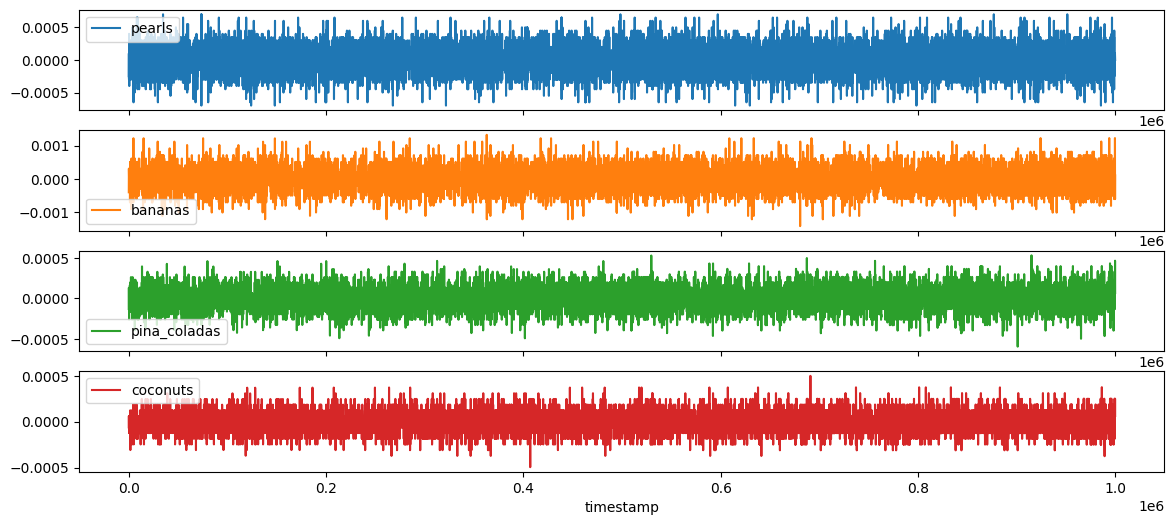

In [16]:
returns = np.log(df['mid_price']/ df['mid_price'].shift(1))
returns.dropna(inplace=True)
returns.plot(subplots=True, figsize=(14,6))

# Correlation Plots

array([[<Axes: xlabel='pearls', ylabel='pearls'>,
        <Axes: xlabel='bananas', ylabel='pearls'>,
        <Axes: xlabel='pina_coladas', ylabel='pearls'>,
        <Axes: xlabel='coconuts', ylabel='pearls'>],
       [<Axes: xlabel='pearls', ylabel='bananas'>,
        <Axes: xlabel='bananas', ylabel='bananas'>,
        <Axes: xlabel='pina_coladas', ylabel='bananas'>,
        <Axes: xlabel='coconuts', ylabel='bananas'>],
       [<Axes: xlabel='pearls', ylabel='pina_coladas'>,
        <Axes: xlabel='bananas', ylabel='pina_coladas'>,
        <Axes: xlabel='pina_coladas', ylabel='pina_coladas'>,
        <Axes: xlabel='coconuts', ylabel='pina_coladas'>],
       [<Axes: xlabel='pearls', ylabel='coconuts'>,
        <Axes: xlabel='bananas', ylabel='coconuts'>,
        <Axes: xlabel='pina_coladas', ylabel='coconuts'>,
        <Axes: xlabel='coconuts', ylabel='coconuts'>]], dtype=object)

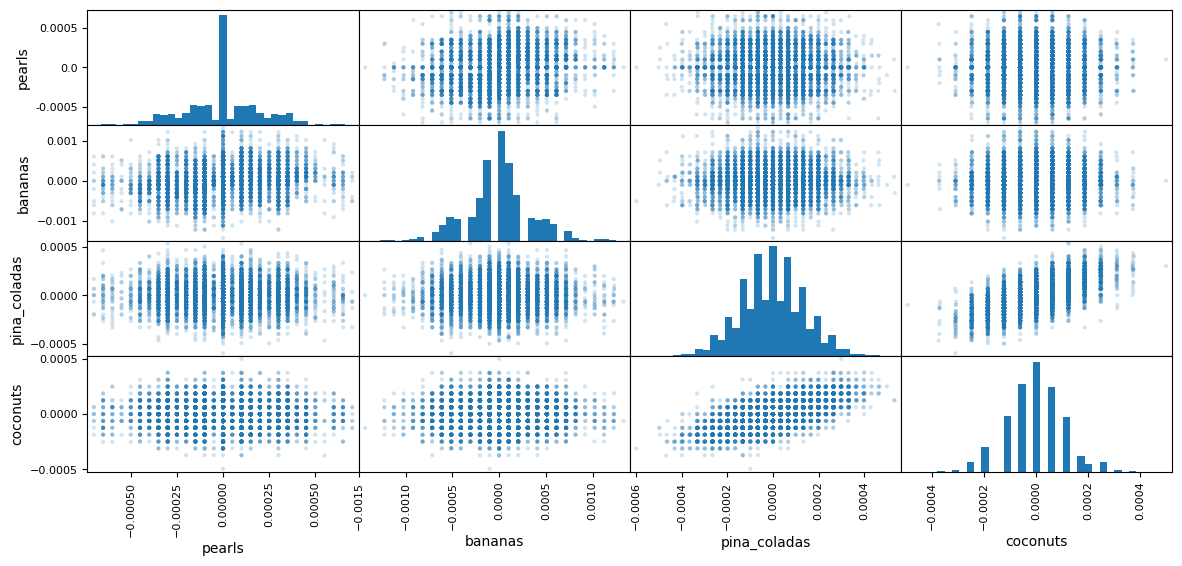

In [17]:
pd.plotting.scatter_matrix(returns, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(14,6))

<Axes: >

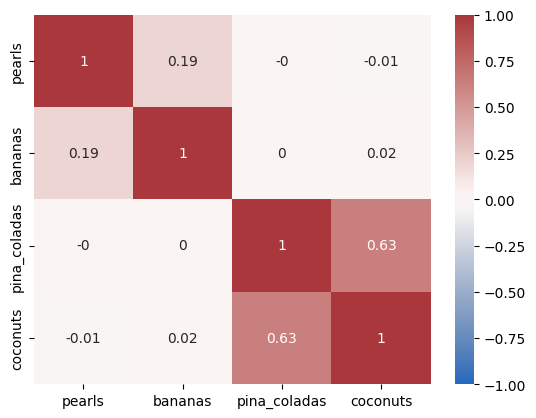

In [18]:
sns.heatmap(returns.corr().round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')

# Pairwise Scatter Plots

## Pearls vs Bananas

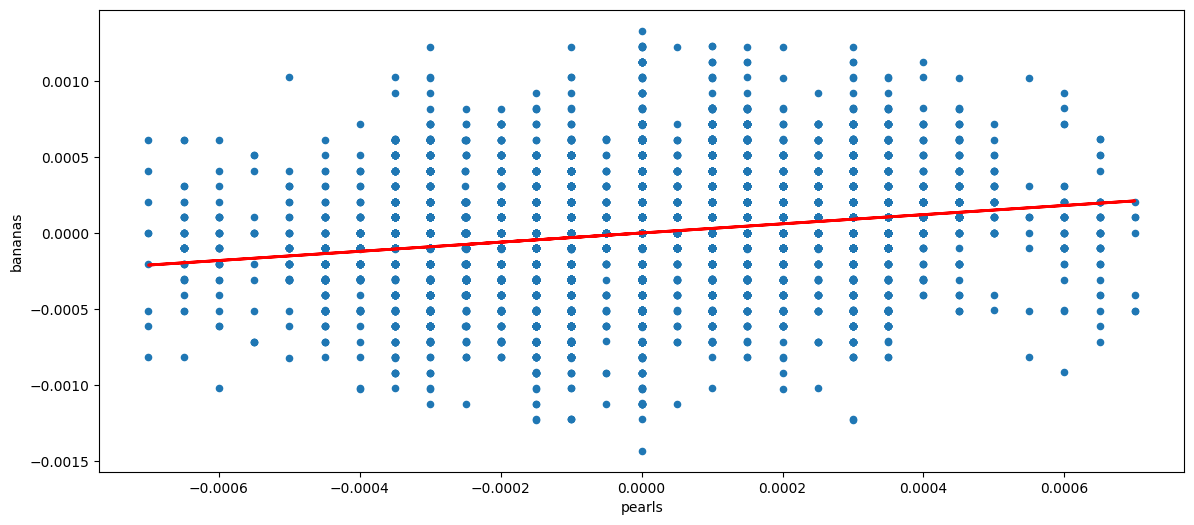

In [19]:
regression_pearls_bananas = np.polyfit(returns['pearls'], returns['bananas'], deg=1)

ax_PB = returns.plot(kind='scatter', x= 'pearls', y='bananas', figsize=(14,6))
ax_PB.plot(returns['pearls'], np.polyval(regression_pearls_bananas, returns['pearls']), 'r', lw=2)

In [20]:
returns.corr()

,pearls,bananas,pina_coladas,coconuts
pearls,1.000000,0.189859,-0.002672,-0.008166
bananas,0.189859,1.000000,0.003895,0.017089
pina_coladas,-0.002672,0.003895,1.000000,0.625630
coconuts,-0.008166,0.017089,0.625630,1.000000


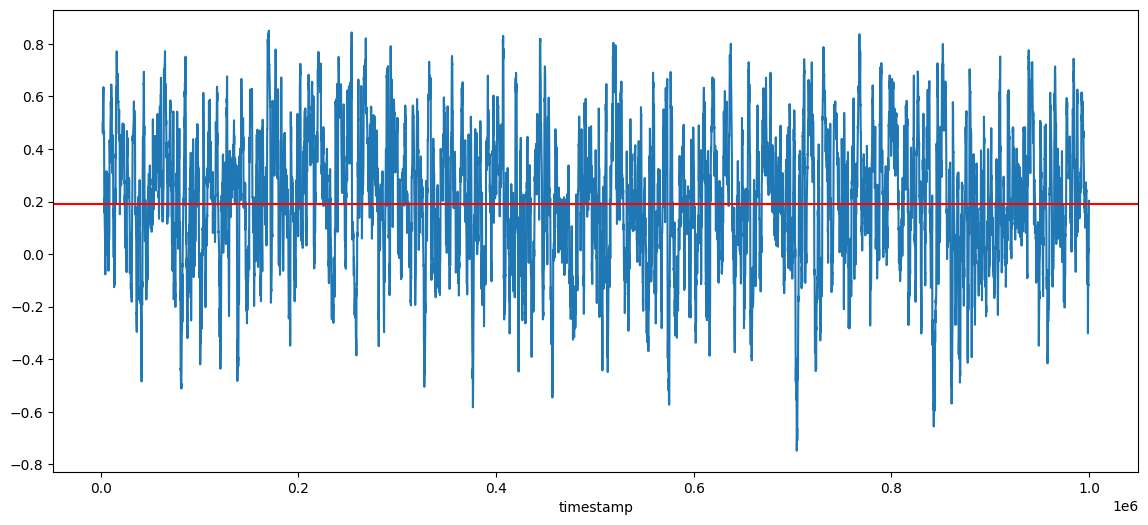

In [21]:
ax = returns['pearls'].rolling(window=20).corr(returns['bananas']).plot(figsize=(14,6))
ax.axhline(returns.corr().iloc[0,1], c='r')

## Coconuts vs Pina Coladas

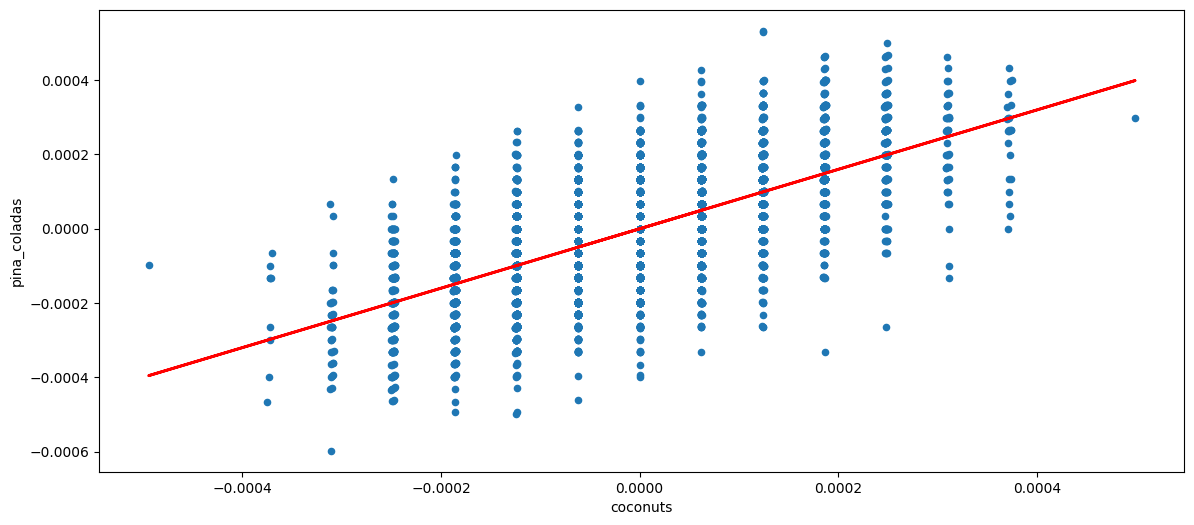

In [22]:
regression_coconuts_coladas = np.polyfit(returns['coconuts'], returns['pina_coladas'], deg=1)

ax_CPC = returns[['coconuts', 'pina_coladas']].plot(kind='scatter', x= 'coconuts', y='pina_coladas', figsize=(14,6))
ax_CPC.plot(returns['coconuts'], np.polyval(regression_coconuts_coladas, returns['coconuts']), 'r', lw=2)

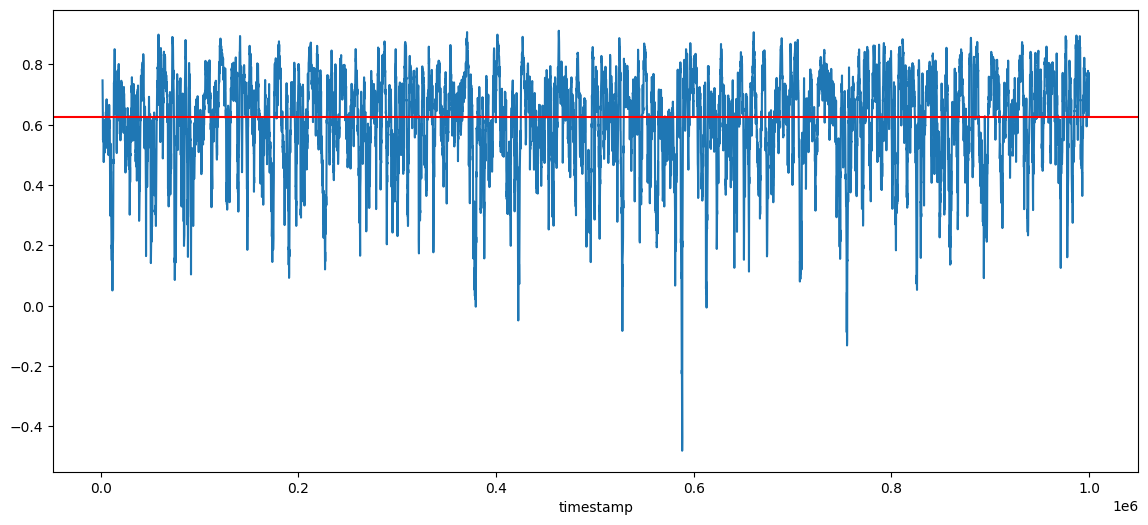

In [23]:
ax_CPC = returns['coconuts'].rolling(window=20).corr(returns['pina_coladas']).plot(figsize=(14,6))
ax_CPC.axhline(returns.corr().iloc[2,3], c='r')